In [65]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import folium

### check file

In [73]:
merged_geo_csv_path = os.path.join("dist", "merged_geo.csv")
merged_csv_path = os.path.join("dist", "merged.csv")

if os.path.exists(merged_geo_csv_path):
    geo = pd.read_csv(merged_geo_csv_path)
else:
    print("Error: Merge Geo file not found")
    exit(1)
    
if os.path.exists(merged_csv_path):
    df = pd.read_csv(merged_csv_path)
else:
    print("Error: Merge file not found")
    exit(1)
    

geo = geo.dropna()
df = df.dropna()

for colonne in df.columns:
    if df[colonne].dtype == 'object': 
        df[colonne] = df[colonne].str.replace(',', '.')  

# Graph

## Carte

In [67]:
carte = folium.Map(location=[45.75, 4.85], zoom_start=10)

def get_color(vainqueur_id):
    if vainqueur_id == 0:
        return 'blue'
    elif vainqueur_id == 1:
        return 'red'
    elif vainqueur_id == 2:
        return 'green'
    
for index, row in geo.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']], 
                  popup=row['commune'], 
                  icon=folium.Icon(color=get_color(row['vainqueur_id']))).add_to(carte)
    
carte

## Repartition inscrits par chomage par  votes exprimés

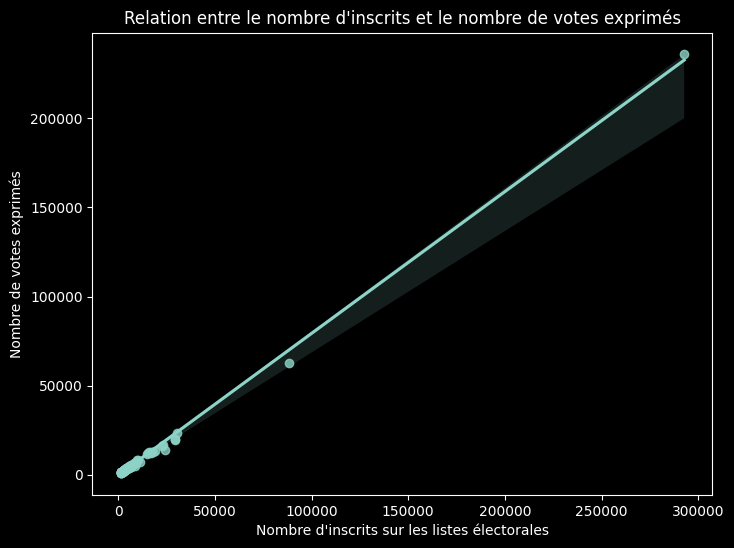

In [68]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Inscrits', y='Exprimés', data=df)
plt.xlabel('Nombre d\'inscrits sur les listes électorales')
plt.ylabel('Nombre de votes exprimés')
plt.title('Relation entre le nombre d\'inscrits et le nombre de votes exprimés')
plt.show()

## Chomage par participation

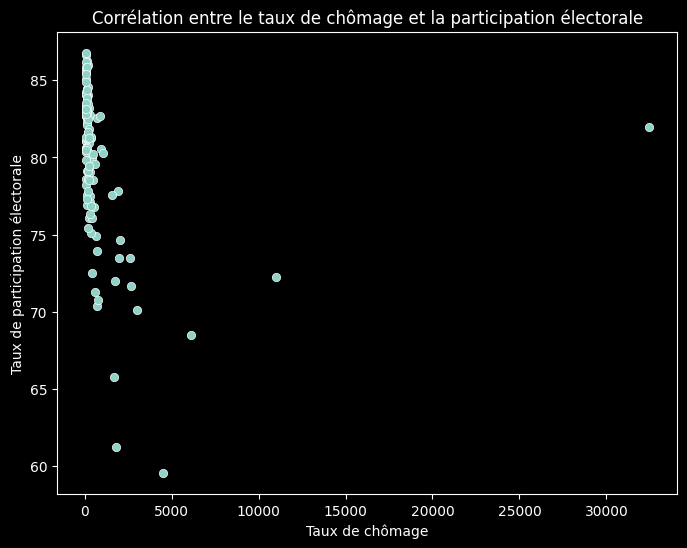

In [69]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='nb_chomeurs', y='% Vot/Ins', data=df)
plt.xlabel('Taux de chômage')
plt.ylabel('Taux de participation électorale')
plt.title('Corrélation entre le taux de chômage et la participation électorale')
plt.show()


## Carte thermique des corrélations entre les variables électorales et socio-économiques

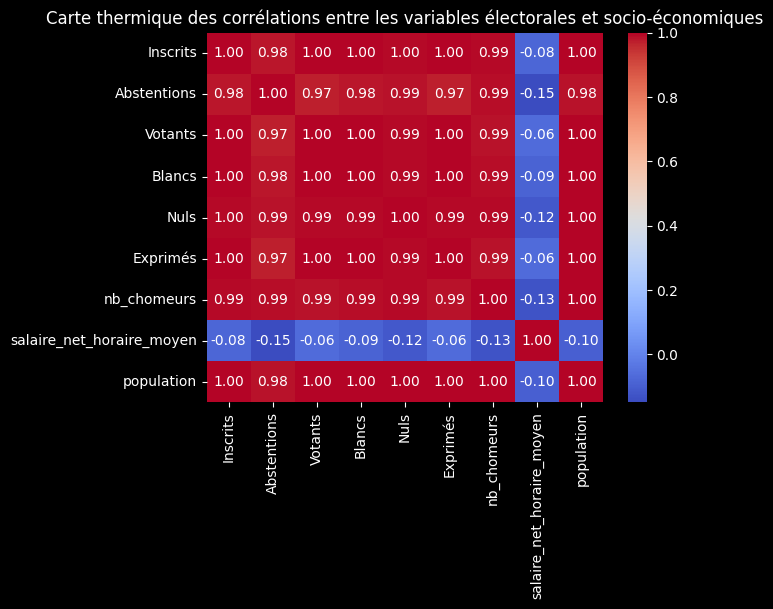

In [70]:
selected_columns = ['Inscrits', 'Abstentions', 'Votants', 'Blancs', 'Nuls', 'Exprimés', 'nb_chomeurs', 'salaire_net_horaire_moyen', 'population']

correlation_matrix = df[selected_columns].corr()

plt.figure()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Carte thermique des corrélations entre les variables électorales et socio-économiques')
plt.show()

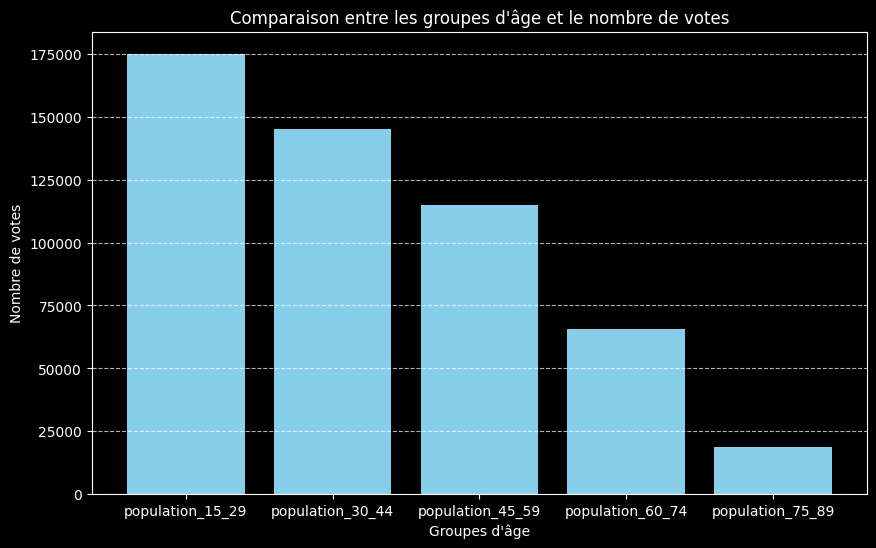

In [71]:
groupes_age = ['population_15_29', 'population_30_44', 'population_45_59', 'population_60_74', 'population_75_89']

somme_population_par_age = [df[colonne].sum() for colonne in groupes_age]

nombre_votes = df['Exprimés'].sum()

votes_par_age = [votes * somme_population / nombre_votes for votes, somme_population in zip(somme_population_par_age, somme_population_par_age)]

plt.figure(figsize=(10, 6))
plt.bar(range(len(groupes_age)), votes_par_age, color='skyblue')
plt.xticks(range(len(groupes_age)), groupes_age)
plt.xlabel('Groupes d\'âge')
plt.ylabel('Nombre de votes')
plt.title('Comparaison entre les groupes d\'âge et le nombre de votes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## carte thermique des age et des vote 

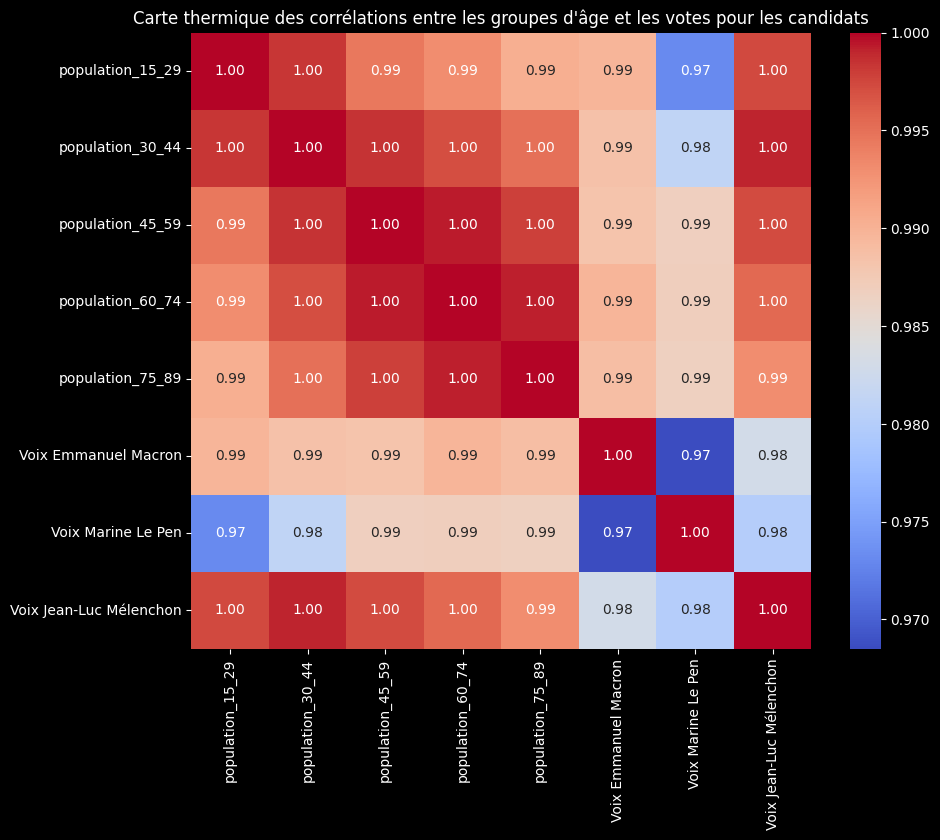

In [72]:
colonnes_age = ['population_15_29', 'population_30_44', 'population_45_59', 'population_60_74', 'population_75_89']
colonnes_votes = ['Voix Emmanuel Macron', 'Voix Marine Le Pen', 'Voix Jean-Luc Mélenchon'] 

data_heatmap = df[colonnes_age + colonnes_votes]

correlation_matrix = data_heatmap.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Carte thermique des corrélations entre les groupes d\'âge et les votes pour les candidats')
plt.show()